In [2]:
import numpy as np
import pandas as pd

**Считываем данные из файла**

In [3]:
data = pd.read_csv('../../data/beauty.csv', sep=';')

In [4]:
type(data)

pandas.core.frame.DataFrame

**Смотрим на первые 5 строк**

In [5]:
data.head()

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
0,5.73,30,0,1,0,1,1,1,14,4
1,4.28,28,0,1,0,1,1,0,12,3
2,7.96,35,0,1,0,1,0,0,10,4
3,11.57,38,0,1,0,0,1,1,16,3
4,11.42,27,0,1,0,0,1,0,16,3


In [6]:
data.shape

(1260, 10)

**Краткая статистика – info и describe**

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1260 entries, 0 to 1259
Data columns (total 10 columns):
wage        1260 non-null float64
exper       1260 non-null int64
union       1260 non-null int64
goodhlth    1260 non-null int64
black       1260 non-null int64
female      1260 non-null int64
married     1260 non-null int64
service     1260 non-null int64
educ        1260 non-null int64
looks       1260 non-null int64
dtypes: float64(1), int64(9)
memory usage: 98.5 KB


In [8]:
data.describe()

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
count,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000
mean,6.306690,18.206349,0.272222,0.933333,0.073810,0.346032,0.691270,0.273810,12.563492,3.185714
std,4.660639,11.963485,0.445280,0.249543,0.261564,0.475892,0.462153,0.446089,2.624489,0.684877
min,1.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000
25%,3.707500,8.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,12.000000,3.000000
50%,5.300000,15.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,12.000000,3.000000
75%,7.695000,27.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,13.000000,4.000000
max,77.720000,48.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,17.000000,5.000000


**Индексация**

In [9]:
data['exper'].head()

0    30
1    28
2    35
3    38
4    27
Name: exper, dtype: int64

**loc и iloc**

In [10]:
data.loc[0:5, ['wage', 'female']]

,wage,female
0,5.73,1
1,4.28,1
2,7.96,1
3,11.57,0
4,11.42,0
5,3.91,1


In [11]:
data.iloc[:,2:4].head()

,union,goodhlth
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


**Логическая индексация**

In [12]:
data[data['female'] == 1]['wage'].mean(), \
data[data['female'] == 0]['wage'].mean()

(4.299357798165136, 7.3688228155339734)

In [13]:
data[(data['female'] == 0) & (data['married'] == 1)]['wage'].median(), \
data[(data['female'] == 0) & (data['married'] == 0)]['wage'].median()

(6.710000000000001, 5.0649999999999995)

**Groupby**

In [14]:
data.groupby('looks')[['wage', 'exper']].agg(np.median)

,wage,exper
looks,,
1,3.460,32.0
2,4.595,18.0
3,5.635,18.0
4,5.240,12.5
5,4.810,8.0


**Сводная таблица**

In [15]:
pd.crosstab(data['female'], data['married'])

married,0,1
female,,
0,166,658
1,223,213


In [16]:
pd.crosstab(data['female'], data['looks'])

looks,1,2,3,4,5
female,,,,,
0,8,88,489,228,11
1,5,54,233,136,8


**Добавление столбцов (построение признаков)**

In [17]:
data['is_rich'] = (data['wage'] > 
                   data['wage'].quantile(.75)).astype('int64')

In [18]:
data.head()

,wage,exper,union,goodhlth,black,female,married,service,educ,looks,is_rich
0,5.73,30,0,1,0,1,1,1,14,4,0
1,4.28,28,0,1,0,1,1,0,12,3,0
2,7.96,35,0,1,0,1,0,0,10,4,1
3,11.57,38,0,1,0,0,1,1,16,3,1
4,11.42,27,0,1,0,0,1,0,16,3,1


**map и apply**

In [19]:
d =  {1: 'union', 0: 'non-union'}

In [20]:
data['union'].map(d).head()

0    non-union
1    non-union
2    non-union
3    non-union
4    non-union
Name: union, dtype: object

In [21]:
data['female'].apply(lambda female: 'female' if female else 'male').head()

0    female
1    female
2    female
3      male
4      male
Name: female, dtype: object

# Задания:

## Создание сводных таблиц и построение новых признаков

Создать сводную таблицу и просмотреть зависимость между привлекательностью и замужеством

Проверить гипотезу о том, что мужчины больше зарабатывают 

проверить гипотезу о том, что с ростом опыта растет и средняя ставка

Создать новый признак "Красавчики". Это те, кто привлекателен больше 3 и женат

Создать новый признак - Перспектива и оценить ее по трехбальной системе: Low - средняя зп меньше 4 и стаж более 30 лет. Hight - зп выше 6 и стаж менее 15 лет. Normal- зп от 5 до 6 долларов и стаж от 15 до 25 лет 

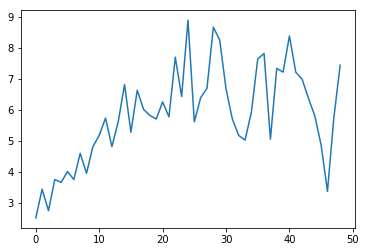

In [22]:
import pylab
pylab.plot(range(49),data.groupby('exper')[[ 'wage']].agg(np.median))
pylab.show()

In [25]:
data['kras']=((data['married']>0)& (data['looks']>3)).astype('int64')

In [26]:
data

,wage,exper,union,goodhlth,black,female,married,service,educ,looks,is_rich,kras
0,5.73,30,0,1,0,1,1,1,14,4,0,1
1,4.28,28,0,1,0,1,1,0,12,3,0,0
2,7.96,35,0,1,0,1,0,0,10,4,1,0
3,11.57,38,0,1,0,0,1,1,16,3,1,0
4,11.42,27,0,1,0,0,1,0,16,3,1,0
5,3.91,20,0,0,0,1,1,0,12,3,0,0
6,8.76,12,0,1,0,0,1,0,16,3,1,0
7,7.69,5,1,1,0,0,0,0,16,4,0,0
8,5.00,5,0,1,0,1,0,0,16,3,0,0
9,3.89,12,0,1,0,1,0,0,12,3,0,0


In [86]:
data.groupby('exper')[[ 'wage']].agg(np.median)

,wage
exper,
0,2.515
1,3.440
2,2.750
3,3.750
4,3.660
5,4.010
6,3.750
7,4.595
8,3.955


In [30]:
def new(a):
    if a>5:
        return 'Hight'
    else:
        return 'Low'

In [31]:
data['klass']=data['wage'].map(new)